# Mental health and substance use disorders -- Exploratory Data Analysis


### Outline:
1.   Problem Identification 

2.   Data Wrangling 
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Data visualization
 * Statistics

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation


**First, let's load the data.**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is C:\Users\yuhan\Desktop\Springboard\Capstone project-2


In [3]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'figures',
 'Mental health and substance disorders data',
 'Mental health and substance use disorders_data wrangling.ipynb',
 'Mental health and substance use disorders_EDA.ipynb',
 'Mental health and substance use disorders_Modeling.ipynb',
 'Mental health and substance use disorders_Pre-Processing and Training Data Development.ipynb',
 'models']

In [4]:
path = 'data'
os.chdir(path)

In [5]:
os.listdir()

['GDP_per_capita_output.csv',
 'mental_substance_age_output.csv',
 'mental_substance_gdp_output.csv',
 'mental_substance_gender_output.csv',
 'mental_substance_output.csv']

In [6]:
gdpPerCapita = pd.read_csv('GDP_per_capita_output.csv', index_col=0)
gdpPerCapita.head()

,Entity,Code,Year,GDP per capita ($)
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507
2,Afghanistan,AFG,2004,1062.249360
3,Afghanistan,AFG,2005,1136.123214
4,Afghanistan,AFG,2006,1161.124889


In [7]:
ageGroups = pd.read_csv('mental_substance_age_output.csv', index_col=0)
ageGroups.head()

,Entity,Code,Year,10-14 years old (%),15-19 years old (%),20-24 years old (%),25-29 years old (%),30-34 years old (%),All ages (%),5-14 years old (%),15-49 years old (%),50-69 years old (%),70+ years old (%),Age-standardized (%)
0,Afghanistan,AFG,1990,17.963929,20.746551,20.394054,20.968224,21.363230,16.471540,14.857525,20.796416,17.911218,14.549360,17.553463
1,Afghanistan,AFG,1991,18.308466,21.059514,20.690527,21.226918,21.628881,16.750416,15.122301,21.064413,18.109323,14.680612,17.837032
2,Afghanistan,AFG,1992,18.618200,21.360629,20.975017,21.437639,21.855734,17.022630,15.353386,21.309476,18.300797,14.795600,18.092542
3,Afghanistan,AFG,1993,18.854464,21.590949,21.184427,21.595253,22.046316,17.208295,15.529752,21.498997,18.464068,14.886083,18.294931
4,Afghanistan,AFG,1994,19.022019,21.741705,21.313204,21.725390,22.158546,17.230492,15.624982,21.635443,18.558568,14.941922,18.428908


In [8]:
gender = pd.read_csv('mental_substance_gender_output.csv', index_col=0)
gender.head()

,Entity,Code,Year,Male (%),Female (%)
0,Afghanistan,AFG,1990,17.448695,17.634233
1,Afghanistan,AFG,1991,17.771263,17.873184
2,Afghanistan,AFG,1992,18.051575,18.092318
3,Afghanistan,AFG,1993,18.275848,18.265196
4,Afghanistan,AFG,1994,18.427490,18.383394


In [9]:
mental_sub = pd.read_csv('mental_substance_output.csv', index_col=0)
mental_sub.head()

,Entity,Code,Year,Mental and substance use disorders (%),Share of total disease (%),"Deaths - Mental and substance use disorders (per 100,000)","Suicide Rate (per 100,000)",Alcohol use disorders (%),Drug use disorders (%),Depressive disorders (%),Bipolar disorder (%),Anxiety disorders (%),Eating disorders (%),Schizophrenia (%)
0,Afghanistan,AFG,1990,17.553463,1.320975,0.144067,10.318504,0.672404,1.677082,4.071831,0.697779,4.828830,0.101855,0.160560
1,Afghanistan,AFG,1991,17.837032,1.354445,0.140653,10.327010,0.671768,1.684746,4.079531,0.697961,4.829740,0.099313,0.160312
2,Afghanistan,AFG,1992,18.092542,1.506504,0.135279,10.271411,0.670644,1.694334,4.088358,0.698107,4.831108,0.096692,0.160135
3,Afghanistan,AFG,1993,18.294931,1.487670,0.133047,10.376123,0.669738,1.705320,4.096190,0.698257,4.830864,0.094336,0.160037
4,Afghanistan,AFG,1994,18.428908,1.389687,0.130073,10.575915,0.669260,1.716069,4.099582,0.698469,4.829423,0.092439,0.160022


## Explore mental_sub dataframe 
Try to understand why mental health and substance use disorders are important, and the relationship with suicide and gdp.
### Build data profiles and tables

In [10]:
mental_sub.describe()

,Year,Mental and substance use disorders (%),Share of total disease (%),"Deaths - Mental and substance use disorders (per 100,000)","Suicide Rate (per 100,000)",Alcohol use disorders (%),Drug use disorders (%),Depressive disorders (%),Bipolar disorder (%),Anxiety disorders (%),Eating disorders (%),Schizophrenia (%)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,13.004642,4.642531,5.014424,12.068240,1.585821,0.862278,3.497654,0.719145,3.989921,0.239998,0.211644
std,8.078372,1.848711,2.233705,9.795962,8.037739,0.860283,0.460679,0.655859,0.171589,1.167526,0.158141,0.044253
min,1990.000000,9.715255,0.174323,0.034565,1.526792,0.446940,0.383650,2.139903,0.314535,2.023393,0.073908,0.146902
25%,1996.750000,11.488694,2.825027,0.356321,6.741737,0.993685,0.535064,3.005529,0.615532,3.188824,0.122387,0.181530
50%,2003.500000,12.484004,4.512848,1.254213,10.668531,1.479937,0.726430,3.499606,0.693134,3.554373,0.182525,0.199563
75%,2010.250000,14.274301,6.342170,4.235866,14.742472,1.867834,0.940157,3.912381,0.835063,4.682163,0.292666,0.236365
max,2017.000000,19.115460,12.031016,89.797874,98.831696,5.474668,3.452476,6.602754,1.206597,8.967330,0.943991,0.375110


* The mean of mental and substance use disorders share of pupolation is 13%, this is a vary high number, that means there are 13 people is suffering ental and substance use disorders per 100 people in the world.
* There is more people suffering in depressive disorder (3.4977%) and anxiety disorder(3.9899%).

#### Reviewing for Outliers and Anamolies

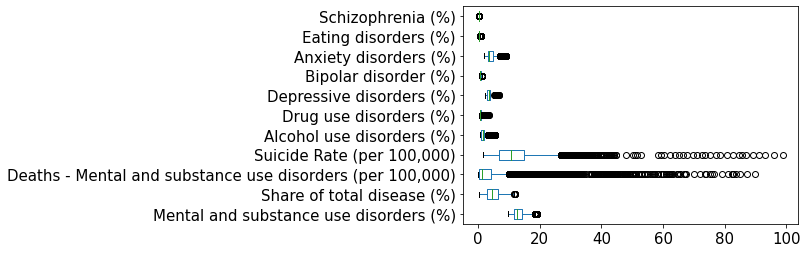

In [11]:
mental_sub.drop(columns=['Year']).boxplot(grid=False, vert=False,fontsize=15)

It shows all columns have outliers with more 1.5×IQR above the third quartile. Let's remove outliers.

In [12]:
# get the outliers

Q1 = mental_sub.quantile(0.25)
Q3 = mental_sub.quantile(0.75)
IQR = Q3 - Q1

# Outliers
mental_sub_o = mental_sub[((mental_sub < (Q1 - 1.5 * IQR)) |(mental_sub > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
mental_sub_no = mental_sub.drop(mental_sub_o.index)

### Explore data relationships

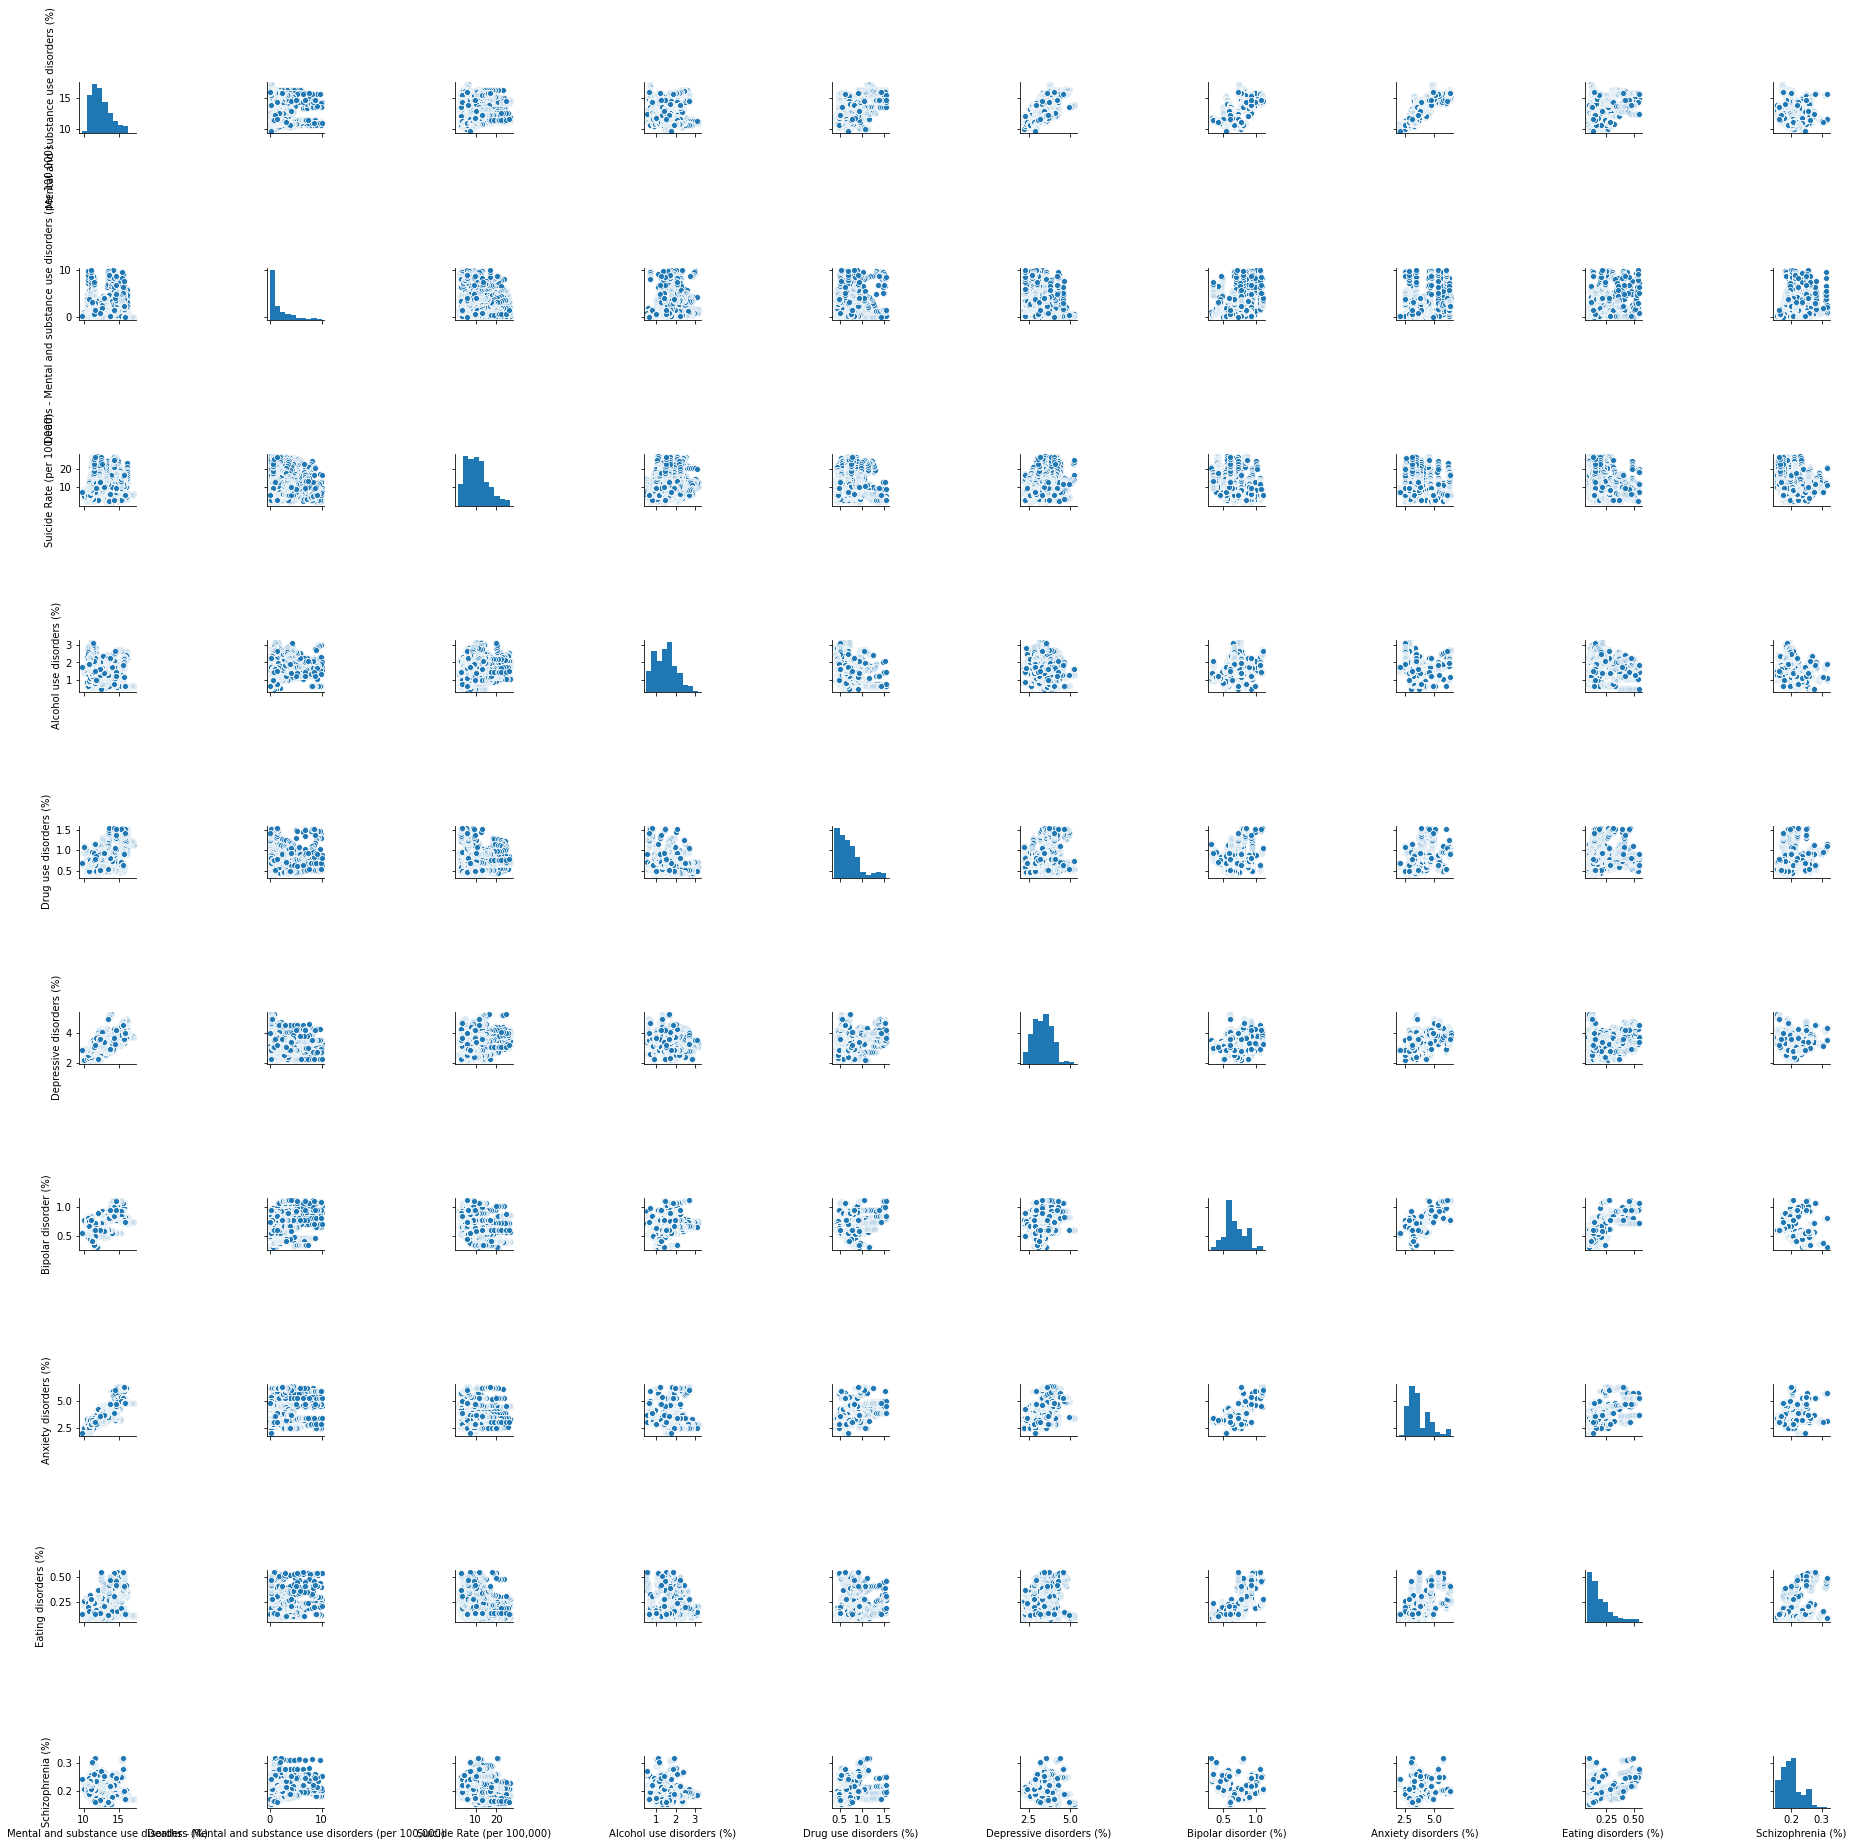

In [13]:
sns.pairplot(mental_sub_no.drop(columns=['Year', 'Share of total disease (%)']))

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

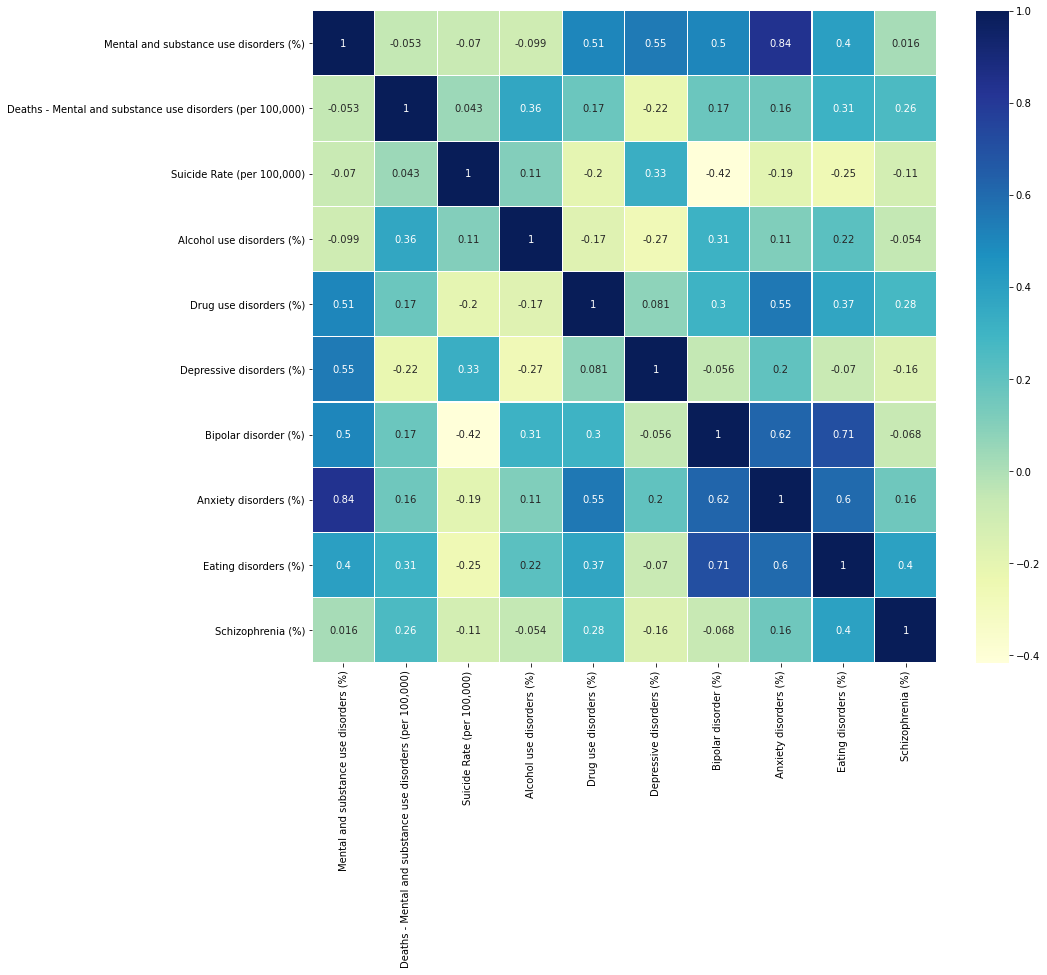

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(mental_sub_no.drop(columns=['Year', 'Share of total disease (%)']).corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

From the pairplot and corrilation matrix we can infer:
* The direct death from mental and substance use disorders slightly relative with eating disorders, alcohol use disorders and Schizophrenia.
* Suicide rate slightly relative with depressive disorders.

### Check how mental and substance use disorders change in decades

In [15]:
mental_sub.head()

,Entity,Code,Year,Mental and substance use disorders (%),Share of total disease (%),"Deaths - Mental and substance use disorders (per 100,000)","Suicide Rate (per 100,000)",Alcohol use disorders (%),Drug use disorders (%),Depressive disorders (%),Bipolar disorder (%),Anxiety disorders (%),Eating disorders (%),Schizophrenia (%)
0,Afghanistan,AFG,1990,17.553463,1.320975,0.144067,10.318504,0.672404,1.677082,4.071831,0.697779,4.828830,0.101855,0.160560
1,Afghanistan,AFG,1991,17.837032,1.354445,0.140653,10.327010,0.671768,1.684746,4.079531,0.697961,4.829740,0.099313,0.160312
2,Afghanistan,AFG,1992,18.092542,1.506504,0.135279,10.271411,0.670644,1.694334,4.088358,0.698107,4.831108,0.096692,0.160135
3,Afghanistan,AFG,1993,18.294931,1.487670,0.133047,10.376123,0.669738,1.705320,4.096190,0.698257,4.830864,0.094336,0.160037
4,Afghanistan,AFG,1994,18.428908,1.389687,0.130073,10.575915,0.669260,1.716069,4.099582,0.698469,4.829423,0.092439,0.160022


In [16]:
# make functions to get the top 3 coutries with biggest change from 1990 to 1999, from 2000 to 2009, and from 2010 to 2017
# make a function to conver the year row to columns and calculate the change in each decades
def change(data, c):
    cols = [0, 1, 2, c]
    data_change = data[data.columns[cols]]
    data_change = data_change.pivot_table(index=['Entity', 'Code'], columns=['Year'], values=data_change.columns[3])
    data_change.reset_index(inplace=True)
    data_change.columns.names = [None]
    data_change['1990 ~ 1999'] = data_change[1999] - data_change[1990]
    data_change['2000 ~ 2009'] = data_change[2009] - data_change[2000]
    data_change['2010 ~ 2017'] = data_change[2017] - data_change[2010]
    return data_change

# function to display dataframes side by side
from IPython.display import display_html 
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
# function to get the top 3 coutries with biggest change for each feature
def top_3(data):
    top3_90_99 = data.sort_values(['1990 ~ 1999'], ascending=False).head(3)[['Entity', '1990 ~ 1999']]
    top3_00_09 = data.sort_values(['2000 ~ 2009'], ascending=False).head(3)[['Entity', '2000 ~ 2009']]
    top3_10_17 = data.sort_values(['2010 ~ 2017'], ascending=False).head(3)[['Entity', '2010 ~ 2017']]
    return display_side_by_side(top3_90_99, top3_00_09, top3_10_17)

In [17]:
for i in range(3, len(mental_sub.columns)):
    df = change(mental_sub, i)
    print(str(mental_sub.columns[i]) + '-- top 3 coutries with biggest change')
    print(top_3(df))

Mental and substance use disorders (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
0,Afghanistan,0.849154
25,Brazil,0.797578
122,Netherlands,0.625952
,Entity,2000 ~ 2009
9,Australia,0.372023
158,Somalia,0.368775
85,Italy,0.250366
,Entity,2010 ~ 2017
99,Libya,0.234751
87,Japan,0.200297


None
Share of total disease (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
130,Oman,2.603264
81,Iran,2.471015
149,Saudi Arabia,2.354491
,Entity,2000 ~ 2009
13,Bahrain,2.730412
106,Maldives,2.392986
141,Qatar,2.070894
,Entity,2010 ~ 2017
75,Haiti,2.601539
24,Botswana,1.611389


None
Deaths - Mental and substance use disorders (per 100,000)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
87,Japan,26.859570
184,United Kingdom,21.074111
48,Denmark,15.362109
,Entity,2000 ~ 2009
122,Netherlands,27.500670
10,Austria,20.266403
17,Belgium,14.851258
,Entity,2010 ~ 2017
122,Netherlands,12.054981
101,Luxembourg,12.036141


None
Suicide Rate (per 100,000)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
16,Belarus,15.190352
143,Russia,14.170576
100,Lithuania,12.170801
,Entity,2000 ~ 2009
160,South Korea,9.190240
97,Lesotho,6.431612
8,Armenia,4.412898
,Entity,2010 ~ 2017
182,Ukraine,6.066839
51,Dominican Republic,1.429428


None
Alcohol use disorders (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
60,Finland,0.608835
143,Russia,0.501899
16,Belarus,0.492894
,Entity,2000 ~ 2009
115,Mongolia,0.896905
89,Kazakhstan,0.754084
114,Moldova,0.318380
,Entity,2010 ~ 2017
123,New Zealand,0.416265
170,Taiwan,0.119282


None
Drug use disorders (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
183,United Arab Emirates,0.593717
32,Canada,0.465805
185,United States,0.432802
,Entity,2000 ~ 2009
0,Afghanistan,0.755489
183,United Arab Emirates,0.453540
99,Libya,0.398783
,Entity,2010 ~ 2017
185,United States,0.475332
9,Australia,0.321991


None
Depressive disorders (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
25,Brazil,0.500311
181,Uganda,0.432320
96,Lebanon,0.341080
,Entity,2000 ~ 2009
17,Belgium,0.304957
97,Lesotho,0.264746
98,Liberia,0.257670
,Entity,2010 ~ 2017
87,Japan,0.211796
82,Iraq,0.193779


None
Bipolar disorder (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
9,Australia,0.015603
61,France,0.014279
105,Malaysia,0.011265
,Entity,2000 ~ 2009
78,Iceland,0.041795
162,Spain,0.018432
123,New Zealand,0.011768
,Entity,2010 ~ 2017
78,Iceland,0.006220
38,Colombia,0.006049


None
Anxiety disorders (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
122,Netherlands,0.662672
123,New Zealand,0.657239
25,Brazil,0.462729
,Entity,2000 ~ 2009
85,Italy,0.312936
81,Iran,0.308767
25,Brazil,0.270857
,Entity,2010 ~ 2017
92,Kuwait,0.128039
122,Netherlands,0.097723


None
Eating disorders (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
101,Luxembourg,0.079766
9,Australia,0.077231
186,United States Virgin Islands,0.070926
,Entity,2000 ~ 2009
9,Australia,0.131537
55,Equatorial Guinea,0.117369
186,United States Virgin Islands,0.083915
,Entity,2010 ~ 2017
154,Singapore,0.045826
187,Uruguay,0.041744


None
Schizophrenia (%)-- top 3 coutries with biggest change


,Entity,1990 ~ 1999
55,Equatorial Guinea,0.011113
105,Malaysia,0.010585
173,Thailand,0.009097
,Entity,2000 ~ 2009
48,Denmark,0.016710
55,Equatorial Guinea,0.014659
119,Myanmar,0.011173
,Entity,2010 ~ 2017
184,United Kingdom,0.010535
119,Myanmar,0.007583


None


Notice that top 3 countries with biggest change for each decade are different. 

### Check the relationship between mental health and substance use disorders rate and GDP per capita

In [18]:
# Merge two datasets
df_1 = mental_sub.set_index(['Entity', 'Code', 'Year'])
df_2 = gdpPerCapita.set_index(['Entity', 'Code', 'Year'])
dataframes = [df_1, df_2]
df_merged = pd.concat(dataframes, axis=1).dropna()
df_merged.reset_index(inplace=True)
df_merged.head()

,Entity,Code,Year,Mental and substance use disorders (%),Share of total disease (%),"Deaths - Mental and substance use disorders (per 100,000)","Suicide Rate (per 100,000)",Alcohol use disorders (%),Drug use disorders (%),Depressive disorders (%),Bipolar disorder (%),Anxiety disorders (%),Eating disorders (%),Schizophrenia (%),GDP per capita ($)
0,Afghanistan,AFG,2002,18.137951,1.721417,0.081991,11.054472,0.659213,1.934326,4.124928,0.701141,4.838318,0.087023,0.162414,1063.635574
1,Afghanistan,AFG,2003,17.958849,1.800411,0.081942,10.931093,0.657354,2.051106,4.125230,0.701860,4.845538,0.087189,0.162916,1099.194507
2,Afghanistan,AFG,2004,17.788825,1.881324,0.082468,10.839790,0.656132,2.163044,4.126384,0.702556,4.851512,0.088158,0.163377,1062.249360
3,Afghanistan,AFG,2005,17.647911,1.989248,0.081971,10.655626,0.655686,2.247443,4.126908,0.703078,4.854684,0.088933,0.163706,1136.123214
4,Afghanistan,AFG,2006,17.539914,2.035171,0.082571,10.538475,0.656297,2.321020,4.128638,0.703517,4.856685,0.090054,0.163977,1161.124889


In [19]:
cols = [
 'Mental and substance use disorders (%)',
 'Share of total disease (%)',
 'Deaths - Mental and substance use disorders (per 100,000)',
 'Suicide Rate (per 100,000)',
 'Alcohol use disorders (%)',
 'Drug use disorders (%)',
 'Depressive disorders (%)',
 'Bipolar disorder (%)',
 'Anxiety disorders (%)',
 'Eating disorders (%)',
 'Schizophrenia (%)']

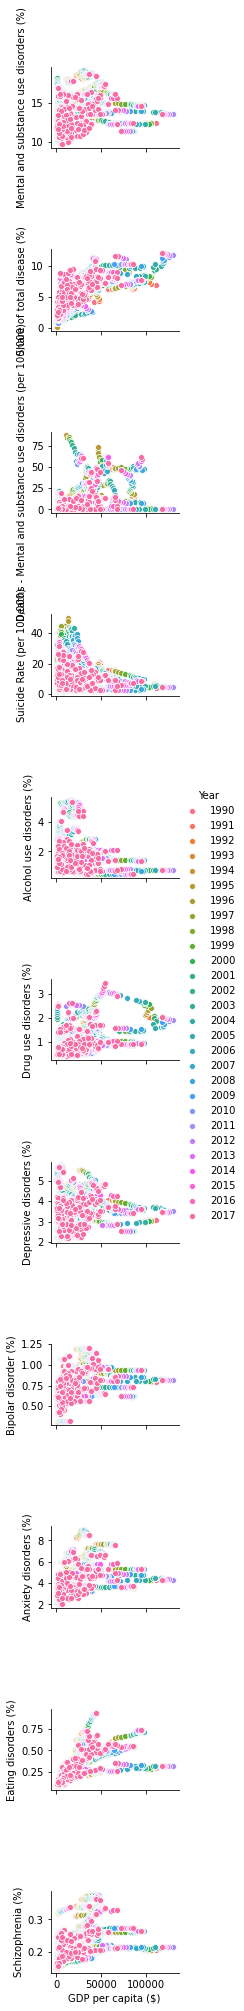

In [20]:
sns.pairplot(data=df_merged,
                  y_vars=cols,
                  x_vars=['GDP per capita ($)'], hue='Year')

It looks like there are some linear relationships between Drug use disorders and GDP per capita, Eating disorders and GDP per capita, Schizophrenia and GDP per capita.

#### Check how well they are related

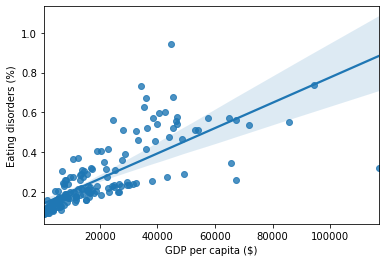

In [21]:
sns.regplot(x = 'GDP per capita ($)', y = 'Eating disorders (%)', data=df_merged[df_merged.Year==2017])

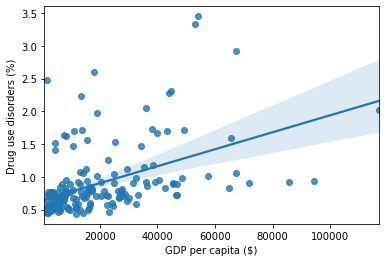

In [22]:
sns.regplot(x = 'GDP per capita ($)', y = 'Drug use disorders (%)', data=df_merged[df_merged.Year==2017])

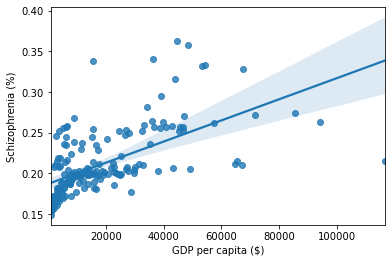

In [23]:
sns.regplot(x = 'GDP per capita ($)', y = 'Schizophrenia (%)', data=df_merged[df_merged.Year==2017])

### Check the share of the population in the top three rich and poor countries.

In [24]:
# Top 3 richest countries in 2017
order = gdpPerCapita[gdpPerCapita.Year == 2017].sort_values(['GDP per capita ($)'], ascending=False)
order.head()

,Entity,Code,Year,GDP per capita ($)
4801,Qatar,QAT,2017,116935.600360
3470,Macao,MAC,2017,104861.851097
3442,Luxembourg,LUX,2017,94277.965357
5198,Singapore,SGP,2017,85535.383200
708,Brunei,BRN,2017,71809.250581


In [25]:
# Top 3 poorest countries in 2017
order.tail(3)

,Entity,Code,Year,GDP per capita ($)
3288,Liberia,LBR,2017,752.787839
792,Burundi,BDI,2017,702.225313
958,Central African Republic,CAF,2017,661.239968


In [26]:
# Filter top 3 richest, poorest countries
# there is no data for Macao in mental_sub, use Singapore instead
countries = ['Qatar', 'Luxembourg', 'Singapore', 'Burundi', 'Central African Republic', 'Liberia']
richest_poorest = mental_sub[mental_sub['Entity'].isin(countries)]

Text(0.5, 1.0, 'Richest vs Poorest Countries')

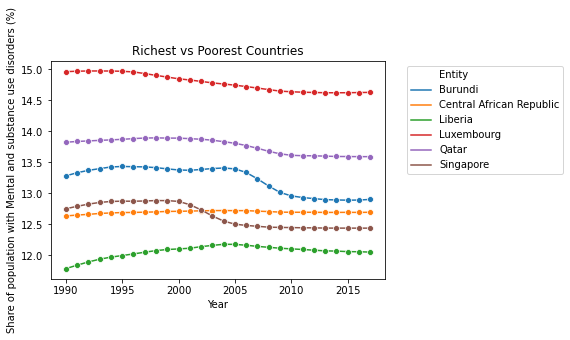

In [27]:
# plot the trend by year with Mental and substance use disorders (%)
sns.lineplot(data = richest_poorest, x = 'Year', 
             y='Mental and substance use disorders (%)', 
             hue='Entity', marker='o')
plt.ylabel('Share of population with Mental and substance use disorders (%)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Richest vs Poorest Countries")

The rich countries tend to have more people have Mental and substance use disorders, and poor countries have less. But for Singapore has less people than Burundi.

## Explore prevalence of mental and substance use disorders across age groups data

In [28]:
ageGroups.describe()

,Year,10-14 years old (%),15-19 years old (%),20-24 years old (%),25-29 years old (%),30-34 years old (%),All ages (%),5-14 years old (%),15-49 years old (%),50-69 years old (%),70+ years old (%),Age-standardized (%)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,13.843204,15.886122,14.865825,14.829490,15.090616,12.779463,10.392677,15.226406,14.742883,13.455206,13.004642
std,8.078372,2.133417,2.555961,2.676551,2.586980,2.530750,2.127102,1.794995,2.441716,1.420786,1.322891,1.848711
min,1990.000000,9.804068,10.998515,9.851233,10.196966,10.736103,9.304492,7.111707,10.873140,10.836164,9.662779,9.715255
25%,1996.750000,12.304926,13.757011,12.692713,12.717292,13.016868,11.009757,9.141420,13.207154,13.978356,12.573461,11.488694
50%,2003.500000,13.169728,15.307039,14.191402,14.164913,14.420812,12.241130,9.759759,14.678906,14.712730,13.494699,12.484004
75%,2010.250000,15.229774,17.701580,16.756932,16.692369,17.012245,14.505915,11.506956,17.002634,15.586071,14.247040,14.274301
max,2017.000000,21.570803,24.957525,25.081546,24.480835,23.860110,19.121172,17.027704,23.275827,19.423087,17.860393,19.115460


**Visulize the Mental and substance use disorders trend by age groups**

Trend by age group in the world

In [29]:
# Filter world dataframe
ageGroups_world = ageGroups[ageGroups['Entity'].isin(['World'])]

Text(0.5, 1.0, 'Share of population by age groups in the world')

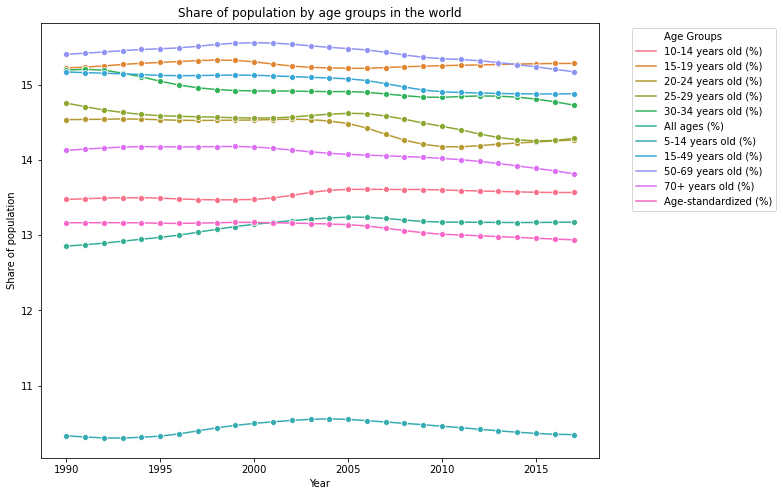

In [30]:
# Plot the trend by year for age groups
df = ageGroups_world.drop(columns=['Entity', 'Code']).melt('Year', var_name='Age Groups', value_name='Share of population')
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='Year', y='Share of population', hue='Age Groups', marker='o')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Share of population by age groups in the world")

* 50-69 age group shows highest percentage, but it went down since 2001.
* 15-19 age group shows second highest percentage, and it went up and got higher percentage than 50-69 age group from 2015
* 5-14 age group shows lowest percentage

Uptrending group:
  1. 15-19 years old
  2. 10-14 years old
  3. All ages
  4. 5-14 years old

### Let's check how each age group changed in decades

In [31]:
# filter world entity from the data
ageGroups_world_change = ageGroups_world.drop(columns=['Entity', 'Code']).set_index('Year')

In [32]:
# Add percentage changed in decades to data
ageGroups_world_change.loc['1990~1999'] = ageGroups_world_change.loc[1999] - ageGroups_world_change.loc[1990]
ageGroups_world_change.loc['2000~2009'] = ageGroups_world_change.loc[2009] - ageGroups_world_change.loc[2000]
ageGroups_world_change.loc['2010~2017'] = ageGroups_world_change.loc[2017] - ageGroups_world_change.loc[2010]
ageGroups_world_change.loc['1990~2017'] = ageGroups_world_change.loc[2017] - ageGroups_world_change.loc[1990]

In [33]:
df = ageGroups_world_change.iloc[[-4, -3, -2, -1]]
df

,10-14 years old (%),15-19 years old (%),20-24 years old (%),25-29 years old (%),30-34 years old (%),All ages (%),5-14 years old (%),15-49 years old (%),50-69 years old (%),70+ years old (%),Age-standardized (%)
Year,,,,,,,,,,,
1990~1999,-0.004980,0.099422,-0.006848,-0.194736,-0.272008,0.259726,0.138579,-0.039651,0.148670,0.052238,0.005527
2000~2009,0.132026,-0.058837,-0.322932,-0.067150,-0.082695,0.038204,-0.017157,-0.196632,-0.193836,-0.136963,-0.137190
2010~2017,-0.032876,0.029698,0.088983,-0.161880,-0.102543,-0.000997,-0.111813,-0.025862,-0.173806,-0.205912,-0.074675
1990~2017,0.092130,0.058837,-0.270310,-0.470481,-0.465238,0.317908,0.015448,-0.288160,-0.230997,-0.311725,-0.226630


In [34]:
df = df.transpose()
df.columns.names = [None]
df.head()

,1990~1999,2000~2009,2010~2017,1990~2017
10-14 years old (%),-0.004980,0.132026,-0.032876,0.092130
15-19 years old (%),0.099422,-0.058837,0.029698,0.058837
20-24 years old (%),-0.006848,-0.322932,0.088983,-0.270310
25-29 years old (%),-0.194736,-0.067150,-0.161880,-0.470481
30-34 years old (%),-0.272008,-0.082695,-0.102543,-0.465238


Text(0, 0.5, 'Percentage Change')

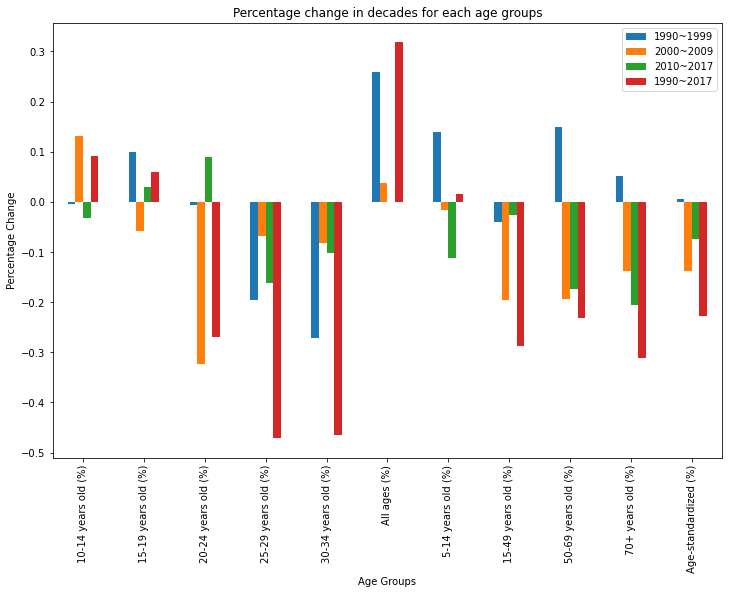

In [35]:
df.plot(kind='bar',figsize=(12,8))
plt.title('Percentage change in decades for each age groups')
plt.xlabel('Age Groups')
plt.ylabel('Percentage Change')

* From 2010 to 2017, mental and substance use disorders decreased almost for all age groups, except 15-19 and 20-24 years old. But for 20-24 years old, it decreased from 1990 to 2009 and the whole period is decresing, while 15-19 shows increasing for most time. 
* For young people 10-19 years old, mental and substance use disorders increased. And for all age level, mental and substance use disorders increased.
* For peole who older than 20 years old, mental and substance use disorders decreased for most years. 


In 1990 to 2017:
* The maximum increase: 10-14 years old
* The minimum increase: 5-14 years old
* The maximum decrease: 25-29 years old
* The minimun decrease: 50-69 years old

### Simpson's paradox method to compare different among age groups in all countries

Let's check how GDP related to different age groups. Are they in same trend or different?

In [36]:
# combine agegoup and gdp datasets
df_1 = ageGroups.set_index(['Entity', 'Code', 'Year'])
df_2 = gdpPerCapita.set_index(['Entity', 'Code', 'Year'])
dataframes = [df_1, df_2]
df_age_gdp = pd.concat(dataframes, axis=1).dropna()
df_age_gdp.reset_index(inplace=True)

In [37]:
# Let's focus on 2017 first
age_gdp_2017 = df_age_gdp[df_age_gdp.Year==2017]

In [38]:
# plot scatter to visualize the relationships
# first, melt data
df_melt = age_gdp_2017.melt(id_vars=['Entity', 'Code', 'Year', 'GDP per capita ($)'], 
        var_name="Age Groups", 
        value_name="Rates (%)")
df_melt.head()

,Entity,Code,Year,GDP per capita ($),Age Groups,Rates (%)
0,Afghanistan,AFG,2017,1803.987487,10-14 years old (%),17.344612
1,Albania,ALB,2017,11803.430594,10-14 years old (%),12.328232
2,Algeria,DZA,2017,13913.839363,10-14 years old (%),15.475726
3,Angola,AGO,2017,5819.494971,10-14 years old (%),12.840627
4,Antigua and Barbuda,ATG,2017,21490.942659,10-14 years old (%),14.937307


It is hard to see the relationships. Let's only focus on a few age groups.

In [39]:
groups = ['5-14 years old (%)', '15-49 years old (%)', '50-69 years old (%)', '70+ years old (%)']

In [40]:
df = df_melt[df_melt['Age Groups'].isin(groups)]

#### Simpson's Paradox with Correlation 

In [41]:
# Definiton of relationship plotting funtion

from numpy.polynomial.polynomial import polyfit
def plot_relationship(data, t, ax):
    """Plot a scatter plot with linear fit"""
    x, y = np.array(data['GDP per capita ($)']), np.array(data['Rates (%)'])
    # Linear fit (polynomial of degree 1)
    b, m = polyfit(x, y, 1)
    # Plot scatterplot
    data.plot(x = 'GDP per capita ($)', y = 'Rates (%)', 
              style = 'o', legend = None, ax = ax, ms = 10)
    # Plot linear fit
    ax.plot(x, m * x + b, '-', color = 'k');

    plt.title(str(t))

    corr_coef = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    plt.ylabel('Rates (%)')
    plt.xlabel('GDP per capita ($)'); 
    plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

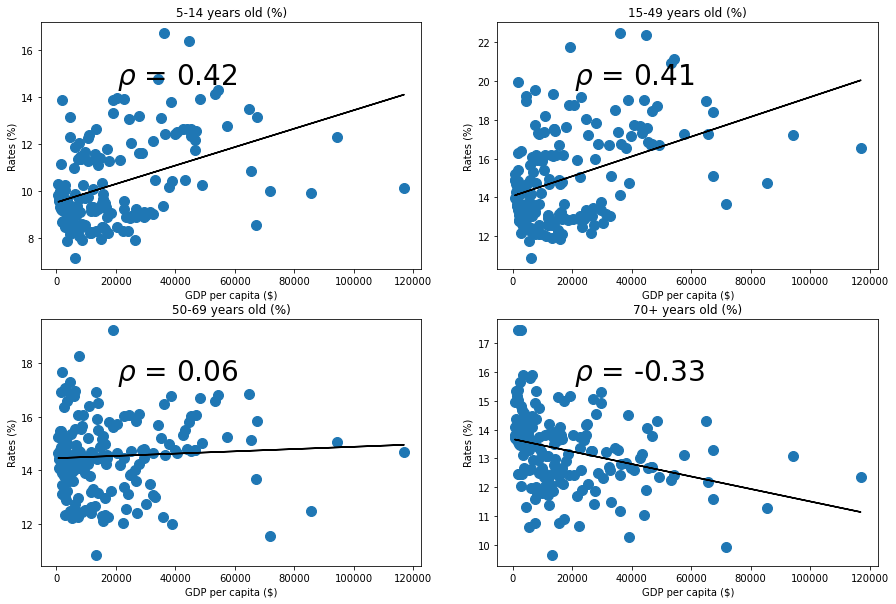

In [42]:
# plot different age group vs GDP 
plt.figure(figsize = (15, 10))
for i in range(len(groups)):
    data = df[df['Age Groups'].isin([groups[i]])]
    j = i + 1
    ax = plt.subplot(2, 2, j)
    plot_relationship(data, groups[i], ax)

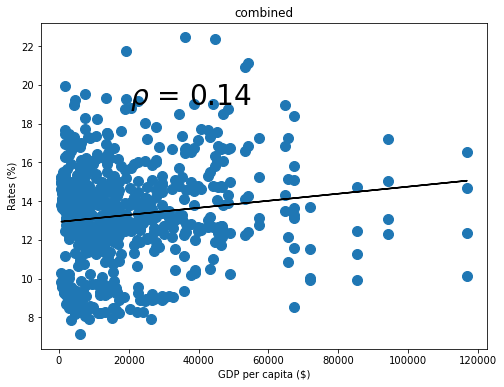

In [43]:
# plot all data vs GDP
plt.figure(figsize = (8, 6))
data = df.copy()
ax = plt.subplot(1, 1, 1)
plot_relationship(data, 'combined', ax)

When looking at the data individually, there is a negative correlation between 70+ years old and GDP per capita, a positive correlation between 5-14 and 15-49 years old and GDP per capita, no correlation between 50-69 years old and GDP per capita, but when aggregating the data, the correlation is only slightly positive! This is due to the presence of another cause, age, on the chance of developing a disease. In order to determine the effect of exercise on the probability of disease, we need to control for the age of patients.

## Explore the share-with-mental-or-substance-disorders-by-sex data

In [44]:
gender.describe()

,Year,Male (%),Female (%)
count,6468.000000,6468.000000,6468.000000
mean,2003.500000,12.610292,13.358836
std,8.078372,1.577035,2.208363
min,1990.000000,8.954316,9.625504
25%,1996.750000,11.377159,11.599258
50%,2003.500000,12.298189,12.797102
75%,2010.250000,13.577942,14.889568
max,2017.000000,18.494218,20.555132


In [45]:
diff_mean = 13.358836 - 12.610292
diff_mean

0.7485440000000008

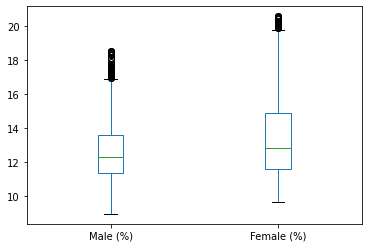

In [46]:
# check the boxplot
gender.boxplot(column=['Male (%)', 'Female (%)'], grid=False)

The mean percentage for male is 12.610292 and the mean percentage for female is 13.358836. It seems there is significant difference between them with (13.358836 - 12.610292) = 0.748544 observed. We can also see difference from boxplot.

Let's use a statistical test to check if it's a significant difference between male and female.

### Outline:
1. Hypothesis formulation
2. Getting the distribution of the data
3. Statistic test (t-test and permutation test)
4. Conclusion

### 1. Hypothesis formulation
Hnull: the observed difference in the mean percentage of Male and Female is due to chance (and thus not due to the gender).


Halternative: the observed difference in the mean percentage of Male and Female is not due to chance (and is actually due to gender)

We're also going to pick a significance level of 0.05.

### 2. Getting the distribution of the data

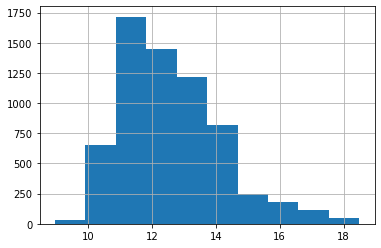

In [47]:
# Create a histogram of male
gender['Male (%)'].hist()

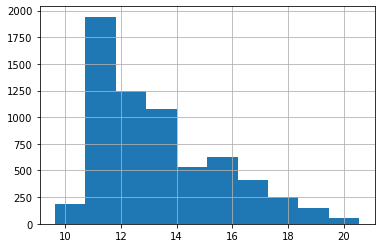

In [48]:
# Create a histogram of female
gender['Female (%)'].hist()

In [49]:
# check whether male data is normally distributed with stats.normaltest() method
from scipy import stats
male_normal = stats.normaltest(gender['Male (%)'])
male_normal

NormaltestResult(statistic=735.4553903807321, pvalue=1.9855971272619783e-160)

In [50]:
# check whether female data is normally distributed with stats.normaltest() method
female_normal = stats.normaltest(gender['Female (%)'])
female_normal

NormaltestResult(statistic=651.5625634494528, pvalue=3.2733092637174737e-142)

Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal.

The p-values for both tests are less than 0.05, and the distribution of the data visually with a histogram are not symmetric,  so the conclusion is that the data are not normally distributed. 

### 3. Statistic test
#### 3.1 t-test

Here, we use t-test with Central Limit Theorem (CLT) because  it applies to the sampling distributions of statistics that have been calculated from non-normal distributions of data

In [51]:
# here, we use t-test function from scipy.stats to calculate the value of the test statistic and then its probability (the p-value).
from scipy.stats import ttest_ind
ttest_ind(gender['Male (%)'], gender['Female (%)'])

Ttest_indResult(statistic=-22.184424979735958, pvalue=4.758285755689205e-107)

The p-value is less than 0.05, we can reject the null hypothesis.

3.2 Permutation test

Since the data aren't normally distributed, we can also use a non-parametric test here -- permutation test. 

In [52]:
# Here I will use permutation_test function from mlxtend library
from mlxtend.evaluate import permutation_test

p_value = permutation_test(gender['Male (%)'], gender['Female (%)'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.0


The p-value from permutation test is 0, so we can reject the null hypothesis. 

### 4. Conclusion

The p-value from t-test and permutation test are less than significance level of 0.05. We can reject our null hypothesis. So our observed data is statistically significant that the mental and substances disorder between male and female are sisnificant different. And from the mean percentage we can see that female tend to have higher percentage than male.

## Next Step: Pre-Processing and Training Data Development
Next step I will use gender dataframe to identify the country outliers using unsupervised clustering machine learning.